# Introduzione

Il codice del progetto è open source con [licenza MIT](https://github.com/OB-UNISA/Statistica/blob/master/LICENSE) ed è possibile trovarlo al seguente link: [https://github.com/OB-UNISA/Statistica](https://github.com/OB-UNISA/Statistica)

I dati unidimensionali esaminati sono quelli del battito cardiaco nel periodo di tre anni di un uomo di età 24 attuali.
I dati bidimensionali riguardano il battito cardiaco della medesima persona nello stesso periodo e il suo relativo peso corporeo.

I dati del battito cardiaco sono stati raccolti tramite l'utilizzo di uno smartwatch, tuttavia essi nel primo anno e mezzo sono stati raccolti con uno smartwatch, mentre nei restanti con un altro smartwatch e per questo vi possono essere differenze nei valori registrati causati da una differenza di misura.
Il peso corporeo è stato anche esso registrato con due bilance differenti, una per il primo anno e un'altra nei restanti e quindi vi potrebbe essere una differenza di misura.

Allo stato dell'arte, importando i dati del battito cardiaco e del peso corporeo da Samsung Health, è possibile visualizzare le proprie statistiche. Questo potrebbe non funzionare in futuro se la forma dei dati venisse cambiata, ossia il parsing dei dati non funzionerebbe più. I commenti sui dati, tuttavia, risulteranno inefficienti in quanto non sono dinamici, bensì basati su un campione di esso.

I dati sul battito cardiaco sono tantissimi, dall'applicazione è possibile scaricarli e mette a disposizione i dati del battito **minuto per minuto** e in un altro file uno sommario dei dati del battito per ogni ora.
I dati minuto per minuto non sono stati considerati in quanto sono troppi, anche i dati ora per ora sono tantissimi, circa 42000, per questo motivo si è deciso di prenderne un campione calcolando tre valori per ogni giorno, nello specifico:
* Media campionaria del battito tra le ore 7 e 14
* Media campionaria del battito tra le ore 15 e 23
* Media campionaria del battito tra le ore 00 e 6

**N.B:** è stata presa la parte intera della media campionaria, scartando i decimali per avere dei valori più simili tra di loro ai fini del progetto, per evitare di avere tante modalità del carattere.

Le fasce orarie sono state scelte in base all'attività quotidiana differente della persona.

I dati sul peso sono stati presi in forma integrale in quanti non di numero eccessivo, circa 500.

# Installazione delle dipendenze

In [29]:
!pip install matplotlib
!pip install pandas

In [30]:
from funzioni import *

In [31]:
#elements = [2, 7, 4, 2, 4, 5, 2, 4, 5, 3, 7, 6, 3, 2, 4, 6, 5, 6, 4, 5, 5, 5, 4, 8, 5, 6, 5, 3, 3, 4, 2, 3, 3, 5, 4, 7, 3, 2, 3, 6, 3, 4, 4, 2, 5, 4, 2, 4, 5, 4, 2, 5, 4, 3, 4, 7, 4, 6, 8, 4, 7, 4, 4, 8, 2, 4, 6, 3, 6, 4, 2, 4, 3, 6, 5, 4, 5, 4, 3, 5]

#elements = [32, 39, 41, 19, 31, 13, 33, 15, 33, 20, 16, 27, 28, 31, 25, 38, 27, 29, 17, 36, 37, 38, 17, 39, 24, 39, 41, 29, 25, 27, 37, 21, 25, 32, 24, 45, 41, 29, 59, 40, 25, 27, 22, 30, 43, 27, 39, 40, 22, 29, 21, 34, 38, 34, 38, 31, 46, 31, 36, 30, 38, 21, 41, 12, 33, 43, 18, 11, 23, 41, 32, 25, 28, 23, 27, 27, 27, 25, 31, 28, 48, 43, 36, 36, 36, 31, 39, 19, 35, 24, 20, 34, 31, 46, 24, 42, 18, 44, 42, 34, 31, 37, 44, 41, 27, 23, 22, 39, 29, 26, 26, 16, 32, 37, 29, 29, 7, 31, 20, 40, 41, 37, 46, 40, 34, 44, 39, 20, 26, 49, 29, 16, 16, 47, 15, 37, 39, 46, 41, 33, 17, 25, 40, 16, 41, 7, 35, 21, 25, 33, 35, 20, 34, 28, 23, 21, 20, 29, 27, 31, 25, 19, 15, 34, 39, 23, 20, 26, 25, 5, 37, 33, 42, 29, 38, 25, 22, 34, 45, 25, 29, 33, 25, 29, 26, 25, 19, 25, 36, 29, 43, 12, 45, 30, 27, 24, 30, 41, 13, 18]

elements = [55, 55, 56, 57, 58, 59, 60, 60, 61, 63, 67, 68, 72, 72, 72, 73, 74, 75, 76, 77, 78, 78, 82, 82, 83, 86, 86, 87, 88, 88]

n = len(elements)

In [32]:
modalita = modalita_del_carattere(elements)
print_stat('v', modalita)

v_1 = 55, v_2 = 56, v_3 = 57, v_4 = 58, v_5 = 59, v_6 = 60, v_7 = 61, v_8 = 63, v_9 = 67, v_10 = 68, v_11 = 72, v_12 = 73, v_13 = 74, v_14 = 75, v_15 = 76, v_16 = 77, v_17 = 78, v_18 = 82, v_19 = 83, v_20 = 86, v_21 = 87, v_21 = 88


In [33]:
freq_assoluta = frequenza_assoluta(elements)
print_stat('f', freq_assoluta)

f_1 = 2, f_2 = 1, f_3 = 1, f_4 = 1, f_5 = 1, f_6 = 2, f_7 = 1, f_8 = 1, f_9 = 1, f_10 = 1, f_11 = 3, f_12 = 1, f_13 = 1, f_14 = 1, f_15 = 1, f_16 = 1, f_17 = 2, f_18 = 2, f_19 = 1, f_20 = 2, f_21 = 1, f_21 = 2


In [34]:
freq_cumulativa_assoluta = frequenza_cumulativa_assoluta(freq_assoluta)
print_stat('F', freq_cumulativa_assoluta)

F_1 = 2, F_2 = 3, F_3 = 4, F_4 = 5, F_5 = 6, F_6 = 8, F_7 = 9, F_8 = 10, F_9 = 11, F_10 = 12, F_11 = 15, F_12 = 16, F_13 = 17, F_14 = 18, F_15 = 19, F_16 = 20, F_17 = 22, F_18 = 24, F_19 = 25, F_20 = 27, F_21 = 28, F_21 = 30


In [35]:
freq_relativa = frequeza_relativa(n, freq_assoluta)
print_stat('p', freq_relativa)

p_1 = 0.06666666666666667, p_2 = 0.03333333333333333, p_3 = 0.03333333333333333, p_4 = 0.03333333333333333, p_5 = 0.03333333333333333, p_6 = 0.06666666666666667, p_7 = 0.03333333333333333, p_8 = 0.03333333333333333, p_9 = 0.03333333333333333, p_10 = 0.03333333333333333, p_11 = 0.1, p_12 = 0.03333333333333333, p_13 = 0.03333333333333333, p_14 = 0.03333333333333333, p_15 = 0.03333333333333333, p_16 = 0.03333333333333333, p_17 = 0.06666666666666667, p_18 = 0.06666666666666667, p_19 = 0.03333333333333333, p_20 = 0.06666666666666667, p_21 = 0.03333333333333333, p_21 = 0.06666666666666667


In [36]:
freq_cumulativa_relativa = frequenza_cumulativa_relativa(n, freq_relativa)
print_stat('P', freq_cumulativa_relativa)

P_1 = 0.0022222222222222222, P_2 = 0.0011111111111111111, P_3 = 0.0011111111111111111, P_4 = 0.0011111111111111111, P_5 = 0.0011111111111111111, P_6 = 0.0022222222222222222, P_7 = 0.0011111111111111111, P_8 = 0.0011111111111111111, P_9 = 0.0011111111111111111, P_10 = 0.0011111111111111111, P_11 = 0.0033333333333333335, P_12 = 0.0011111111111111111, P_13 = 0.0011111111111111111, P_14 = 0.0011111111111111111, P_15 = 0.0011111111111111111, P_16 = 0.0011111111111111111, P_17 = 0.0022222222222222222, P_18 = 0.0022222222222222222, P_19 = 0.0011111111111111111, P_20 = 0.0022222222222222222, P_21 = 0.0011111111111111111, P_21 = 0.0022222222222222222


In [37]:
summary_table(modalita, freq_assoluta, freq_relativa, freq_cumulativa_assoluta, freq_cumulativa_relativa)

,v_i,f_i,p_i,F_i,P_i
i,,,,,
1,55,2,0.066667,2,0.002222
2,56,1,0.033333,3,0.001111
3,57,1,0.033333,4,0.001111
4,58,1,0.033333,5,0.001111
5,59,1,0.033333,6,0.001111
6,60,2,0.066667,8,0.002222
7,61,1,0.033333,9,0.001111
8,63,1,0.033333,10,0.001111
9,67,1,0.033333,11,0.001111


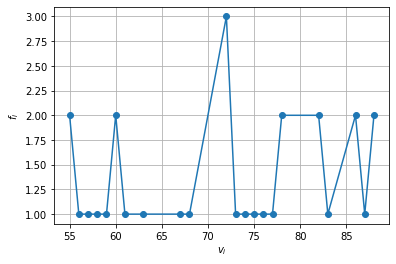

In [38]:
grafico_a_linee(modalita, freq_assoluta, xlabel=r'$v_i$', ylabel='$f_i$', grid=True)

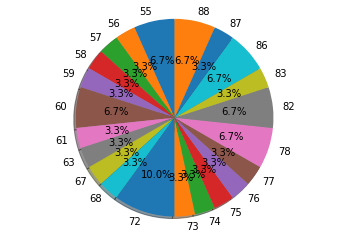

In [39]:
grafico_a_torta(modalita, freq_assoluta)

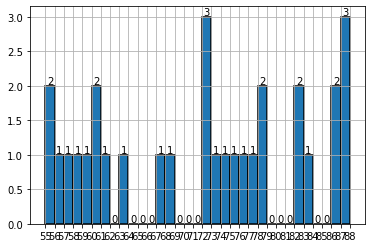

{55: 2.0,
 56: 1.0,
 57: 1.0,
 58: 1.0,
 59: 1.0,
 60: 2.0,
 61: 1.0,
 62: 0.0,
 63: 1.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 1.0,
 68: 1.0,
 69: 0.0,
 70: 0.0,
 71: 0.0,
 72: 3.0,
 73: 1.0,
 74: 1.0,
 75: 1.0,
 76: 1.0,
 77: 1.0,
 78: 2.0,
 79: 0.0,
 80: 0.0,
 81: 0.0,
 82: 2.0,
 83: 1.0,
 84: 0.0,
 85: 0.0,
 86: 2.0,
 87: 3.0}

In [40]:
classi = classi_valori_contigui(elements, ampiezza=1, grid=True, plot=True)
classi

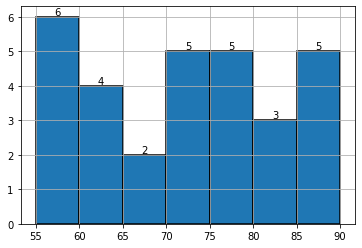

{55: 6.0, 60: 4.0, 65: 2.0, 70: 5.0, 75: 5.0, 80: 3.0, 85: 5.0}

In [41]:
classi_valori_contigui(elements, ampiezza=5, grid=True, plot=True)

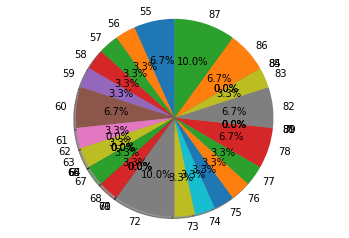

In [42]:
grafico_a_torta(classi.keys(), classi.values())